<hr style="height:1px">
# WorkBook #1
## Initial exploration of Dataset to identify key features affecting respondent's mental health 
<hr style="height:1px">

####  Determining which variables show greater variation in number of mentally unwell respondents over its values : 

- State of Residence
- Month of year
- Cost impeding treatment
- Time since last Checkup
- Hours of Sleep
- Marital status
- Employment Status
- Mobile Phone + Internet Usage
- Gender
- Tobacco and Alcohol consumption
- Healthy Diet
- Race
- Age Group
- Obesity (BMI)
- Education
- Income Group
- Physical Activity
- *Worry about affording basic needs of life* *-*
- *No. of hours of work* *-*

In [2]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('notebook_repr_html',False)

In [86]:
# Read in the SAS format file into a pandas dataframe
cdc = pd.read_sas('LLCP2013.XPT')

In [87]:
# Use only completed survey records (433220 no of records)
cdc = cdc[cdc.DISPCODE == 1100.0]
cdc.shape

(433220, 336)

In [88]:
# Define the list of columns that will be included in the study and make a new dataframe 
# with only those 

cname = ['_STATE', 'FMONTH', 'MEDCOST','CHECKUP1', 'SLEPTIM1', 'ADDEPEV2', 
         'MARITAL', 'EMPLOY1', 'CPDEMO1', 'INTERNET', 'SEX', '_SMOKER3','_RFBING5',
         'USENOW3', '_RACE', '_AGE_G', '_BMI5', '_EDUCAG', '_INCOMG', '_PACAT1',  
         '_RFDRHV4', '_FRUTSUM', '_VEGESUM','SCNTMONY','SCNTMEAL', 'SCNTWRK1','EMTSUPRT']

data = pd.DataFrame() # New Dataframe 27 variables
for each in cdc.columns:
    if each in cname:
        data[each] = cdc[each]

In [89]:
# Define function to remove less useful answers
# For the purposes of this analysis Only Diagnosed Mental Illness column needs cleaned
def cleaner(dframe,variable,val1,val2):
    dframe = dframe[(dframe[variable] != val1) & (dframe[variable] != val2)]
    return dframe

data = cleaner(data,'ADDEPEV2',7.,9.)    

In [90]:
data['ill'] = np.where(data.ADDEPEV2 == 1.0, 1, 0)
data['well'] = np.where(data.ADDEPEV2 == 2.0, 1, 0)
data.drop(['ADDEPEV2'],inplace=True,axis=1)

In [93]:
new = data[['_STATE','ill','well']]
new = new[(new._STATE != 66)]
grouped = new.groupby(['_STATE']).sum().reset_index()
grouped.shape

(52, 3)

In [94]:
code = pd.read_csv('state_codes.csv')
code = code[(code.FIPS != 78)]
code.shape

(52, 3)

In [95]:
sdata = code.merge(grouped, left_on='FIPS', right_on='_STATE', how='inner')
sdata['ratio'] = sdata['ill']/sdata['well']

In [96]:
# PLOT statewise DISTRIBUTION of Ratio of Diagnosed Mentally Ill/Fit Respondents

import plotly.plotly as py
import plotly.graph_objs as go 

df = sdata

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(128,0,0)'],[0.1, 'rgb(220,20,60)'],[0.2, 'rgb(255,99,71)'],\
            [0.3, 'rgb(255,127,80)'],[0.4, 'rgb(255,160,122)'],[0.5, 'rgb(255,228,225)']]

df['text'] = df['Postal'] + '<br>'+'Ratio : '+df['ratio'] + '<br>'

data1 = [ dict(
        type='choropleth',
        zmin = 0.0,
        zmax = 0.5,
        colorscale = scl,
        autorange = False,
        autocolorscale = False,
        locations = df['Postal'],
        z = df['ratio'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Mentally Unwell/Healthy Respondent Ratio"
        )
    ) ]

layout = dict(
        title = 'Distribution of Diagnosed Mental Illness cases',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )
   
fig = dict( data=data1, layout=layout )
py.iplot(fig, validate=False)

#url = py.plot( fig, validate=False,filename='Statewise_mentalill_ratio.png' )

In [97]:
grouped = data.groupby(['FMONTH']).sum().reset_index()
grouped['fraction'] = grouped.ill/(grouped.well+grouped.ill)

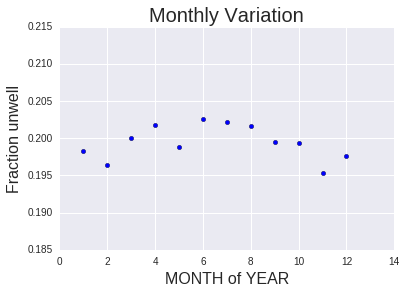

In [98]:
plt.scatter(grouped.FMONTH,grouped.fraction)

plt.xlabel('MONTH of YEAR',size = 16)
plt.ylabel('Fraction unwell',size=16)
plt.title('Monthly Variation',size = 20);

In [99]:
grouped = data.groupby(['MEDCOST']).sum().reset_index()
grouped['fraction'] = grouped.ill/(grouped.well+grouped.ill)

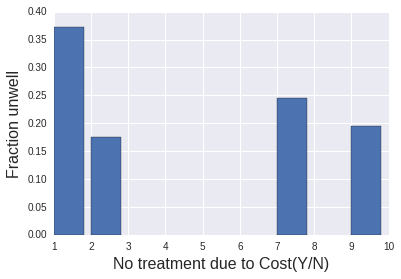

In [100]:
plt.bar(grouped.MEDCOST,grouped.fraction)
plt.xlabel('No treatment due to Cost(Y/N)',size = 16)
plt.ylabel('Fraction unwell',size=16);

In [101]:
grouped = data.groupby(['CHECKUP1']).sum().reset_index()
grouped['fraction'] = grouped.ill/(grouped.well+grouped.ill)

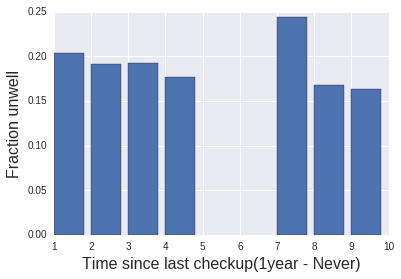

In [102]:
plt.bar(grouped.CHECKUP1,grouped.fraction)
plt.xlabel('Time since last checkup(1year -> Never)',size = 16)
plt.ylabel('Fraction unwell',size=16);

In [103]:
grouped = data.groupby(['SLEPTIM1']).sum().reset_index()
grouped['fraction'] = grouped.ill/(grouped.well+grouped.ill)

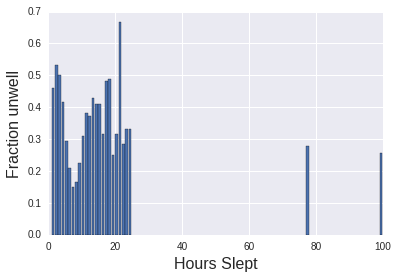

In [104]:
plt.bar(grouped.SLEPTIM1,grouped.fraction)
plt.xlabel('Hours Slept',size = 16)
plt.ylabel('Fraction unwell',size=16);

In [105]:
grouped = data.groupby(['MARITAL']).sum().reset_index()
grouped['fraction'] = grouped.ill/(grouped.well+grouped.ill)

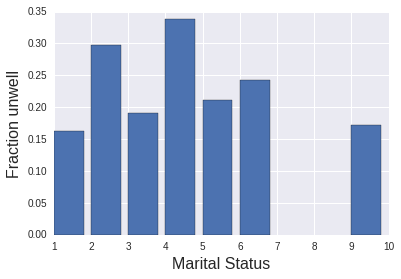

In [106]:
plt.bar(grouped.MARITAL,grouped.fraction)
plt.xlabel('Marital Status',size = 16)
plt.ylabel('Fraction unwell',size=16);

In [107]:
grouped = data.groupby(['EMPLOY1']).sum().reset_index()
grouped['fraction'] = grouped.ill/(grouped.well+grouped.ill)

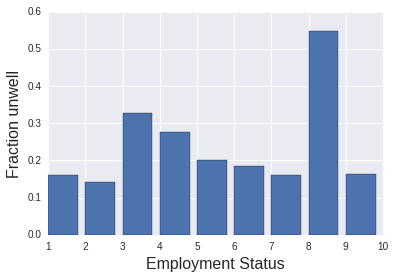

In [108]:
plt.bar(grouped.EMPLOY1,grouped.fraction)
plt.xlabel('Employment Status',size = 16)
plt.ylabel('Fraction unwell',size=16);

In [109]:
grouped = data.groupby(['CPDEMO1']).sum().reset_index()
grouped['fraction'] = grouped.ill/(grouped.well+grouped.ill)

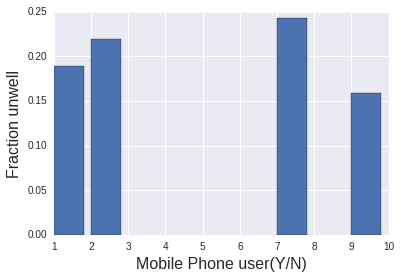

In [110]:
plt.bar(grouped.CPDEMO1,grouped.fraction)
plt.xlabel('Mobile Phone user(Y/N)',size = 16)
plt.ylabel('Fraction unwell',size=16);

In [111]:
grouped = data.groupby(['INTERNET']).sum().reset_index()
grouped['fraction'] = grouped.ill/(grouped.well+grouped.ill)

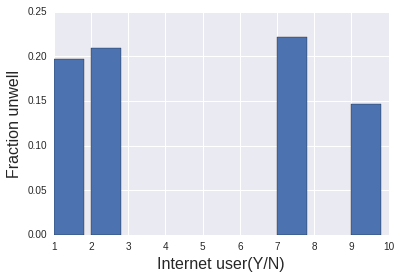

In [112]:
plt.bar(grouped.INTERNET,grouped.fraction)
plt.xlabel('Internet user(Y/N)',size = 16)
plt.ylabel('Fraction unwell',size=16);

In [113]:
grouped = data.groupby(['SEX']).sum().reset_index()
grouped['fraction'] = grouped.ill/(grouped.well+grouped.ill)

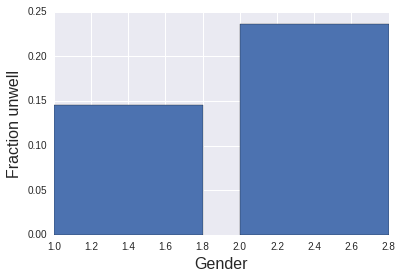

In [114]:
plt.bar(grouped.SEX,grouped.fraction)
plt.xlabel('Gender',size = 16)
plt.ylabel('Fraction unwell',size=16);

In [118]:
grouped = data.groupby(['USENOW3']).sum().reset_index()
grouped['fraction'] = grouped.ill/(grouped.well+grouped.ill)

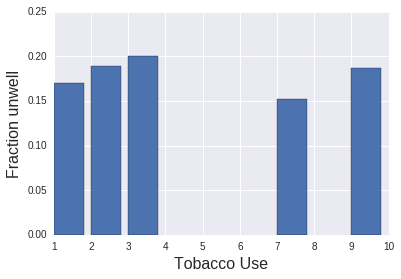

In [119]:
plt.bar(grouped.USENOW3,grouped.fraction)
plt.xlabel('Tobacco Use',size = 16)
plt.ylabel('Fraction unwell',size=16);

In [49]:
grouped = data.groupby(['SCNTMONY']).sum().reset_index()
grouped['fraction'] = grouped.ill/(grouped.well+grouped.ill)

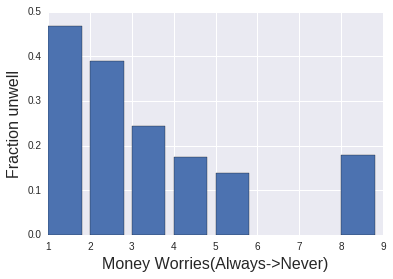

In [50]:
plt.bar(grouped.SCNTMONY,grouped.fraction)
plt.xlabel('Money Worries(Always->Never)',size = 16)
plt.ylabel('Fraction unwell',size=16);

In [51]:
grouped = data.groupby(['SCNTMEAL']).sum().reset_index()
grouped['fraction'] = grouped.ill/(grouped.well+grouped.ill)

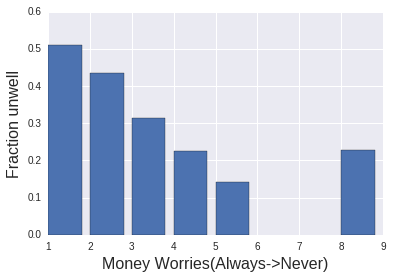

In [52]:
plt.bar(grouped.SCNTMEAL,grouped.fraction)
plt.xlabel('Money Worries(Always->Never)',size = 16)
plt.ylabel('Fraction unwell',size=16);

In [55]:
grouped = data.groupby(['SCNTWRK1']).sum().reset_index()
grouped['fraction'] = grouped.ill/(grouped.well+grouped.ill)

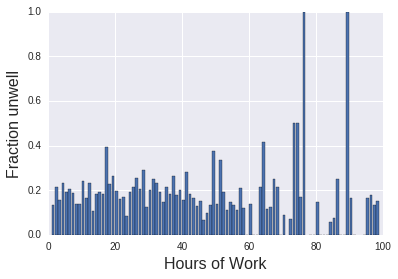

In [56]:
plt.bar(grouped.SCNTWRK1,grouped.fraction)
plt.xlabel('Hours of Work',size = 16)
plt.ylabel('Fraction unwell',size=16);

In [61]:
grouped = data.groupby(['EMTSUPRT']).sum().reset_index()
grouped['fraction'] = grouped.ill/(grouped.well+grouped.ill)

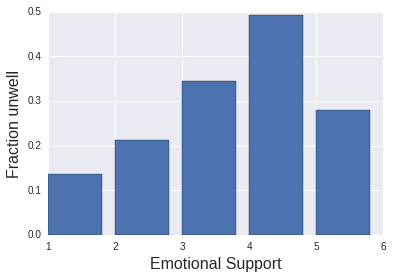

In [62]:
plt.bar(grouped.EMTSUPRT,grouped.fraction)
plt.xlabel('Emotional Support',size = 16)
plt.ylabel('Fraction unwell',size=16);

In [123]:
grouped = data.groupby(['_RACE']).sum().reset_index()
grouped['fraction'] = grouped.ill/(grouped.well+grouped.ill)

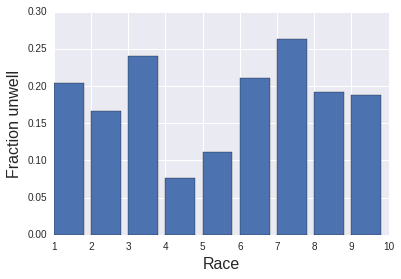

In [124]:
plt.bar(grouped._RACE,grouped.fraction)
plt.xlabel('Race',size = 16)
plt.ylabel('Fraction unwell',size=16);

In [125]:
grouped = data.groupby(['_AGE_G']).sum().reset_index()
grouped['fraction'] = grouped.ill/(grouped.well+grouped.ill)

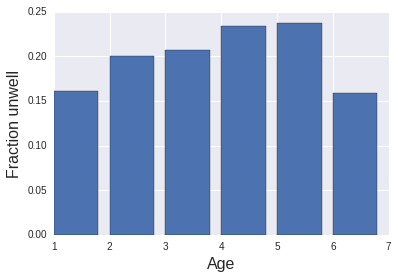

In [126]:
plt.bar(grouped._AGE_G,grouped.fraction)
plt.xlabel('Age',size = 16)
plt.ylabel('Fraction unwell',size=16);

In [129]:
grouped = data.groupby(['_BMI5']).sum().reset_index()
grouped['fraction'] = grouped.ill/(grouped.well+grouped.ill)

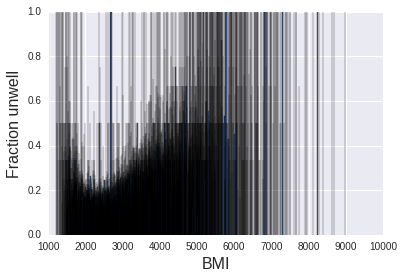

In [130]:
plt.bar(grouped._BMI5,grouped.fraction)
plt.xlabel('BMI',size = 16)
plt.ylabel('Fraction unwell',size=16);

In [132]:
grouped = data.groupby(['_EDUCAG']).sum().reset_index()
grouped['fraction'] = grouped.ill/(grouped.well+grouped.ill)

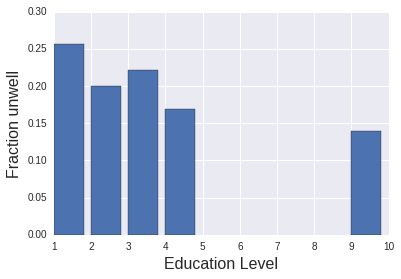

In [133]:
plt.bar(grouped._EDUCAG,grouped.fraction)
plt.xlabel('Education Level',size = 16)
plt.ylabel('Fraction unwell',size=16);

In [135]:
grouped = data.groupby(['_INCOMG']).sum().reset_index()
grouped['fraction'] = grouped.ill/(grouped.well+grouped.ill)

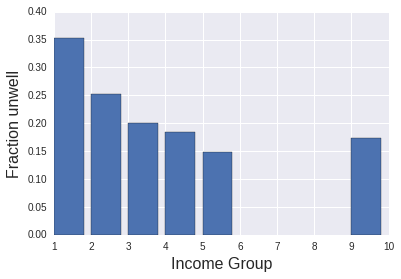

In [136]:
plt.bar(grouped._INCOMG,grouped.fraction)
plt.xlabel('Income Group',size = 16)
plt.ylabel('Fraction unwell',size=16);

In [137]:
grouped = data.groupby(['_SMOKER3']).sum().reset_index()
grouped['fraction'] = grouped.ill/(grouped.well+grouped.ill)

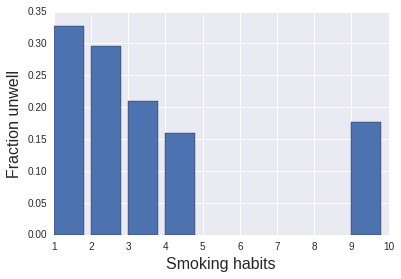

In [139]:
plt.bar(grouped._SMOKER3,grouped.fraction)
plt.xlabel('Smoking habits',size = 16)
plt.ylabel('Fraction unwell',size=16);

In [141]:
grouped = data.groupby(['_RFDRHV4']).sum().reset_index()
grouped['fraction'] = grouped.ill/(grouped.well+grouped.ill)

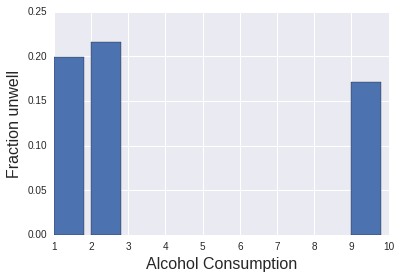

In [142]:
plt.bar(grouped._RFDRHV4,grouped.fraction)
plt.xlabel('Alcohol Consumption',size = 16)
plt.ylabel('Fraction unwell',size=16);

In [144]:
grouped = data.groupby(['_FRUTSUM']).sum().reset_index()
grouped['fraction'] = grouped.ill/(grouped.well+grouped.ill)

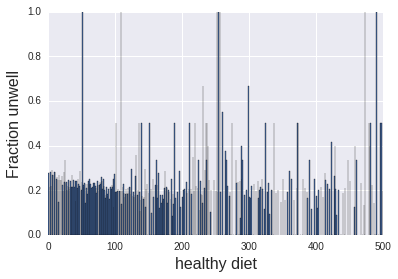

In [150]:
plt.bar(grouped._FRUTSUM,grouped.fraction)
plt.xlabel('healthy diet',size = 16)
plt.ylabel('Fraction unwell',size=16)
plt.xlim(0, 500);

In [152]:
grouped = data.groupby(['_PACAT1']).sum().reset_index()
grouped['fraction'] = grouped.ill/(grouped.well+grouped.ill)

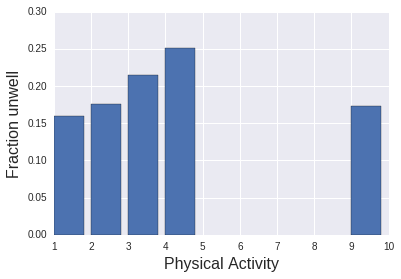

In [153]:
plt.bar(grouped._PACAT1,grouped.fraction)
plt.xlabel('Physical Activity',size = 16)
plt.ylabel('Fraction unwell',size=16);